In [15]:
import matplotlib.pyplot as plt
import pandas as pd

CHANNEL_TITLE = "channel_title"
VIDEO_PUBLISH_DATE = "video_publish_date"
VIDEO_VIEW_COUNT = "video_view_count" 
VIDEO_COMMENT_COUNT = "video_comment_count" 
VIDEO_LIKE_COUNT = "video_like_count"

def plot(data: pd.DataFrame, column: str) -> None:
    (
        data
        .set_index(VIDEO_PUBLISH_DATE)
        .sort_index()
        .groupby(CHANNEL_TITLE)[column]
        .plot(
            marker=".", 
            linestyle="none",
            figsize=(12, 9),
            legend=True,
            logy=True,
        )
    )

def box(data: pd.DataFrame, column: str):
    data.groupby(CHANNEL_TITLE)[[column]].boxplot(
        subplots=False,
        figsize=(12, 9),
    )
    plt.yscale("log")

In [16]:
steve = pd.read_csv("steve.csv")
real = pd.read_csv("real.csv")
df = pd.concat([steve, real])
df[VIDEO_PUBLISH_DATE] = pd.to_datetime(df[VIDEO_PUBLISH_DATE]).dt.date

In [17]:
df[[CHANNEL_TITLE, VIDEO_VIEW_COUNT, VIDEO_COMMENT_COUNT, VIDEO_LIKE_COUNT]].groupby(CHANNEL_TITLE).mean()

,video_view_count,video_comment_count,video_like_count
channel_title,,,
Real Engineering,2.389255e+06,3567.884615,66542.384615
Steve Mould,2.595123e+06,1878.077670,83812.614887


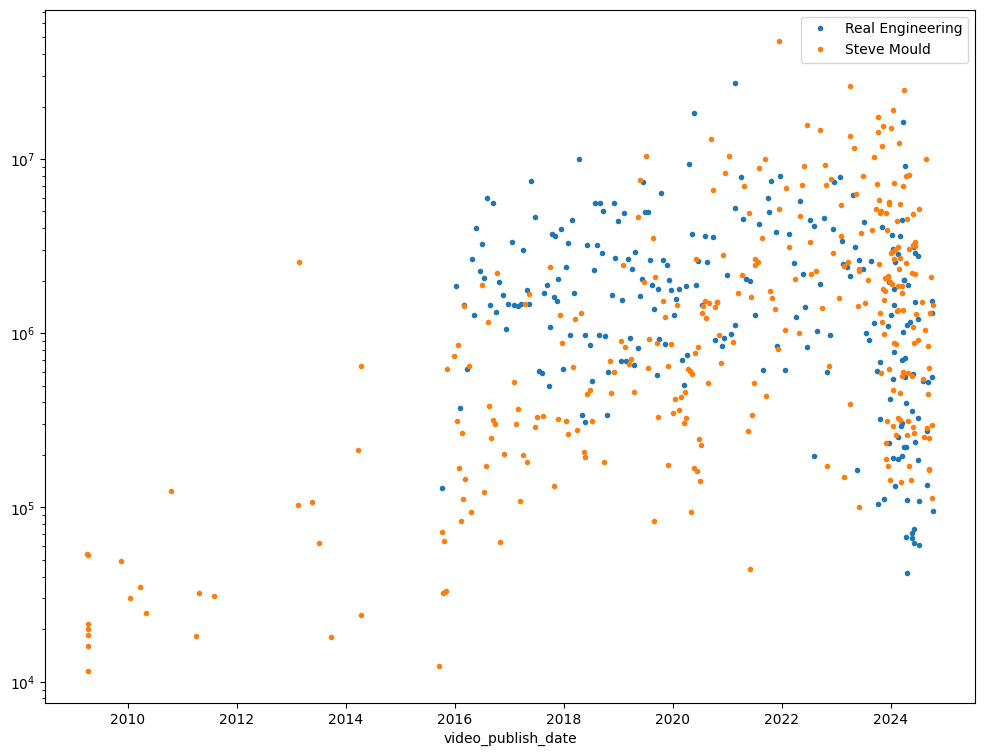

In [18]:
plot(df, VIDEO_VIEW_COUNT)

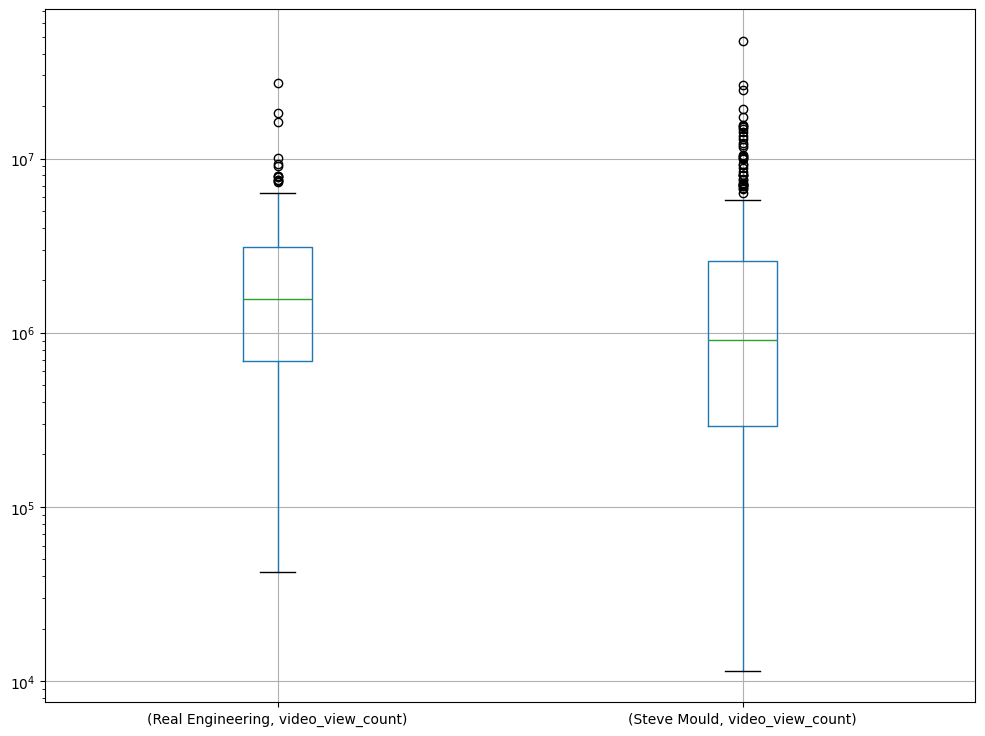

In [19]:
box(df, VIDEO_VIEW_COUNT)

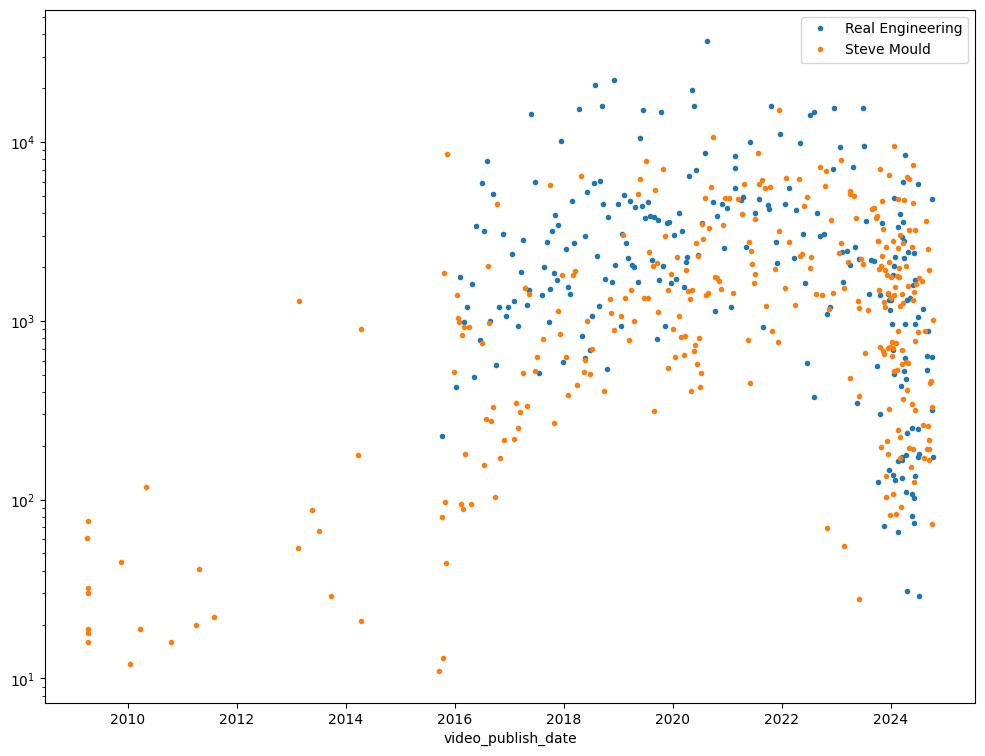

In [20]:
plot(df, VIDEO_COMMENT_COUNT)

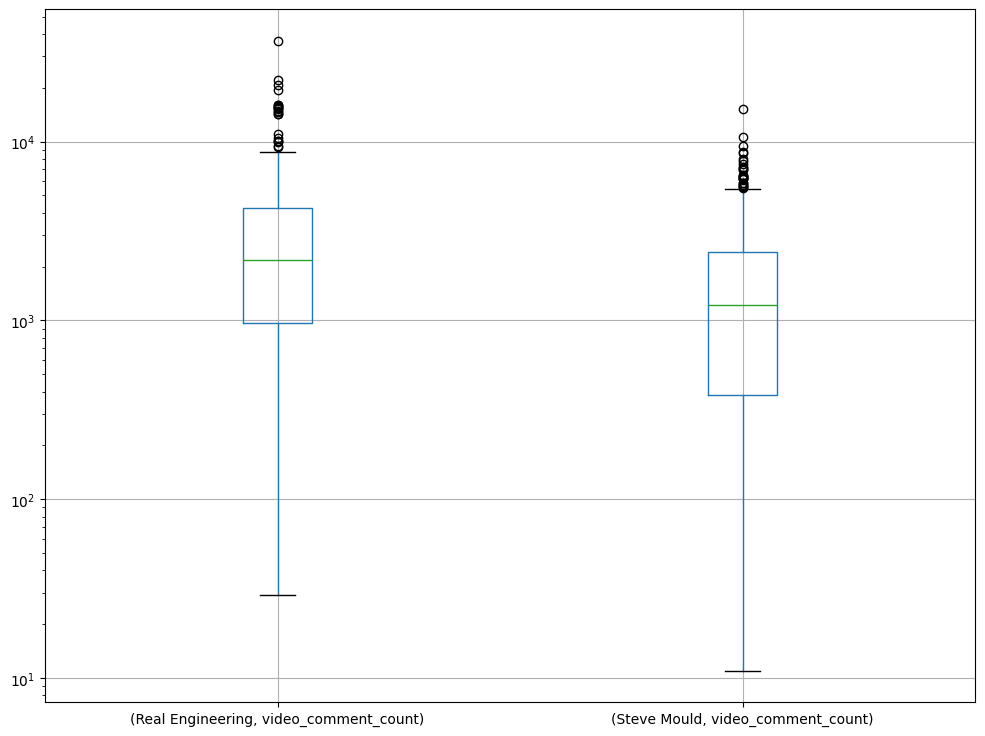

In [21]:
box(df, VIDEO_COMMENT_COUNT)

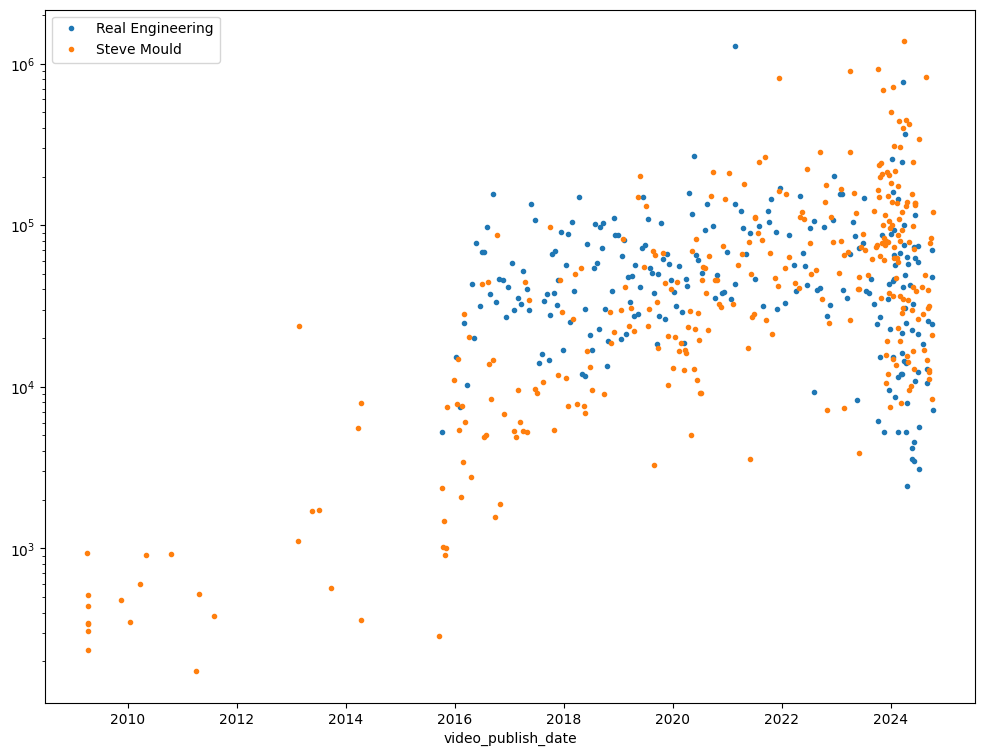

In [22]:
plot(df, VIDEO_LIKE_COUNT)

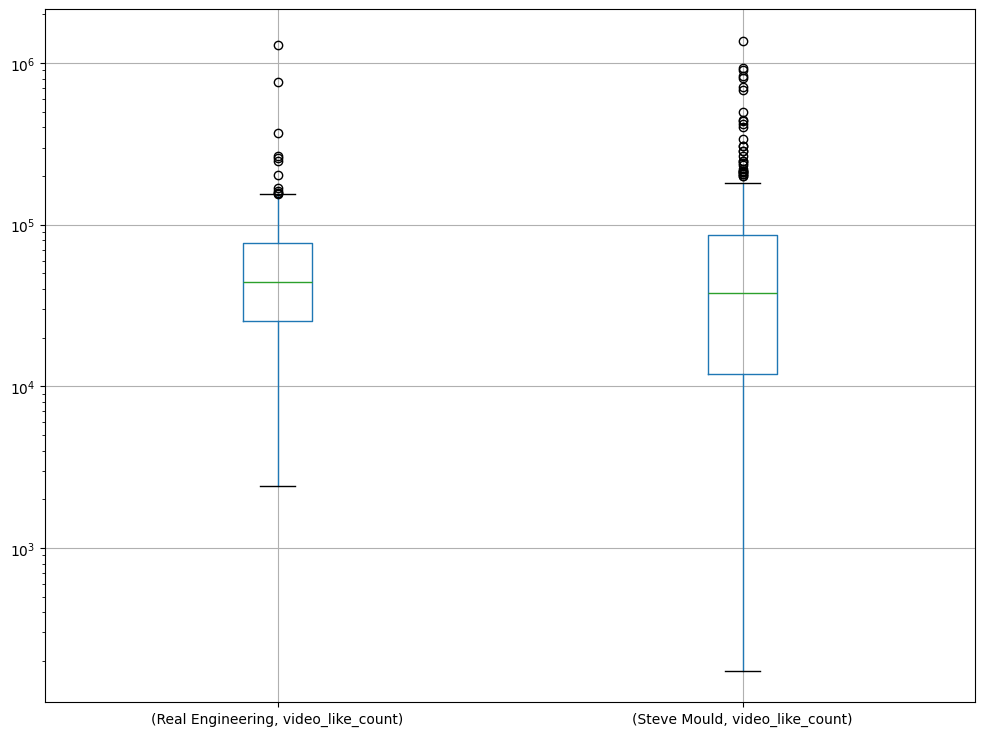

In [23]:
box(df, VIDEO_LIKE_COUNT)

In [24]:
steve.loc[steve[VIDEO_VIEW_COUNT].idxmax()]  # most viewed Steve Mould's video

video_id                                  jJL0XoNBaac
channel_title                             Steve Mould
video_publish_date          2021-12-10 15:00:18+00:00
video_title            The Assassin's Teapot Is Weird
video_view_count                             47505373
video_comment_count                             15129
video_like_count                               808501
video_dislike_count                               NaN
Name: 147, dtype: object

In [25]:
real.loc[real[VIDEO_VIEW_COUNT].idxmax()]  # most viewed Real Engineering's video

video_id                                               sJdYAsnvQo8
channel_title                                     Real Engineering
video_publish_date                       2021-02-24 18:14:58+00:00
video_title            The Hidden Code in the Mars Landing #shorts
video_view_count                                          27295703
video_comment_count                                           8399
video_like_count                                           1290487
video_dislike_count                                            NaN
Name: 115, dtype: object